In [1]:
# import dependencies
#Load and inspect images using the Python Imaging Library (PIL)
from PIL import Image
import os
import numpy as np
#import cv2
from tensorflow import keras
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# read y labels for images from csv file
y_original = pd.read_csv("y_labels.csv", header=None,names=['y_labels'])
# display 1st 5 values
y_original.head()

y_labels
0   Benign
1   Benign
2   Benign
3   Benign
4   Benign

In [3]:
# importing pickle file
path = 'x-ray.pkl'
with open(path, 'rb') as file:
    imgs = pickle.load(file)

In [4]:
# list values contained in imgs
imgs

[array([[0.92156863, 0.92156863, 0.92156863, ..., 0.91764706, 0.91764706,
         0.91764706],
        [0.9254902 , 0.92156863, 0.92156863, ..., 0.91764706, 0.92156863,
         0.91764706],
        [0.92156863, 0.9254902 , 0.92156863, ..., 0.92156863, 0.92156863,
         0.92156863],
        ...,
        [0.9254902 , 0.92156863, 0.92156863, ..., 0.91764706, 0.92156863,
         0.91764706],
        [0.92156863, 0.92156863, 0.92156863, ..., 0.92156863, 0.92156863,
         0.91764706],
        [0.92156863, 0.92156863, 0.92156863, ..., 0.91764706, 0.91764706,
         0.91764706]]),
 array([[0.98431373, 0.98039216, 0.98431373, ..., 0.98039216, 0.98039216,
         0.98039216],
        [0.98431373, 0.98431373, 0.98431373, ..., 0.98039216, 0.98039216,
         0.98039216],
        [0.98431373, 0.98823529, 0.98823529, ..., 0.98039216, 0.98431373,
         0.98431373],
        ...,
        [0.98431373, 0.98431373, 0.98431373, ..., 0.98039216, 0.98039216,
         0.98039216],
        [0.9

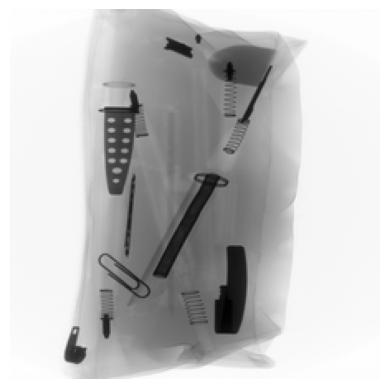

In [5]:
# Display the first resized image to verify picle file
plt.imshow(imgs[0], cmap='gray')  
plt.axis('off')
plt.show()

In [6]:
def reshape(img):
    #Add batch dimension
    reshaped_image_array = np.expand_dims(img, axis=0)

    # For grayscale images, the "channels" dimension must be added
    # Add a channel dimension for grayscale images
    reshaped_image_array = np.expand_dims(reshaped_image_array, axis=-1)

    # View the shape
    #reshaped_image_array.shape
    return reshaped_image_array

In [7]:
def agument(img):
    #call function to reshape the image
    reshaped_image_array = reshape(img)
        
    # Create the ImageDataGenerator object with desired augmentation parameters
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    # Generate augmented images
    augmented_images = []
    for _ in range(5):  # Augment the image 5 times for variety
        augmented_image = next(datagen.flow(reshaped_image_array, batch_size=1))[0]
        augmented_images.append(augmented_image)

    # Visualize the original and augmented images
    plt.figure(figsize=(12, 6))
    for i in range(6):
        plt.subplot(2, 3, i + 1)
        if i == 0:
            plt.imshow((reshaped_image_array[0, :, :, 0]*255).astype('uint8'), cmap='gray')  # Original image
        else:
            plt.imshow((augmented_images[i - 1][:, :, 0]*255).astype('uint8'), cmap='gray')
        plt.axis('off')

    #display images
   # plt.show()
    # return reshaped images
    return augmented_images

[array([[[0.92156863],
         [0.92156863],
         [0.92156863],
         ...,
         [0.9019608 ],
         [0.9019608 ],
         [0.9019608 ]],
 
        [[0.92156863],
         [0.92156863],
         [0.92156863],
         ...,
         [0.9019608 ],
         [0.9019608 ],
         [0.9019608 ]],
 
        [[0.92139256],
         [0.92156863],
         [0.92156863],
         ...,
         [0.9019608 ],
         [0.9019608 ],
         [0.9019608 ]],
 
        ...,
 
        [[0.9019608 ],
         [0.9019608 ],
         [0.9019608 ],
         ...,
         [0.91764706],
         [0.91764706],
         [0.91764706]],
 
        [[0.9019608 ],
         [0.9019608 ],
         [0.9019608 ],
         ...,
         [0.91764706],
         [0.91764706],
         [0.91764706]],
 
        [[0.9019608 ],
         [0.9019608 ],
         [0.9019608 ],
         ...,
         [0.91764706],
         [0.91764706],
         [0.91764706]]], dtype=float32),
 array([[[0.9254902 ],
         [0.92549

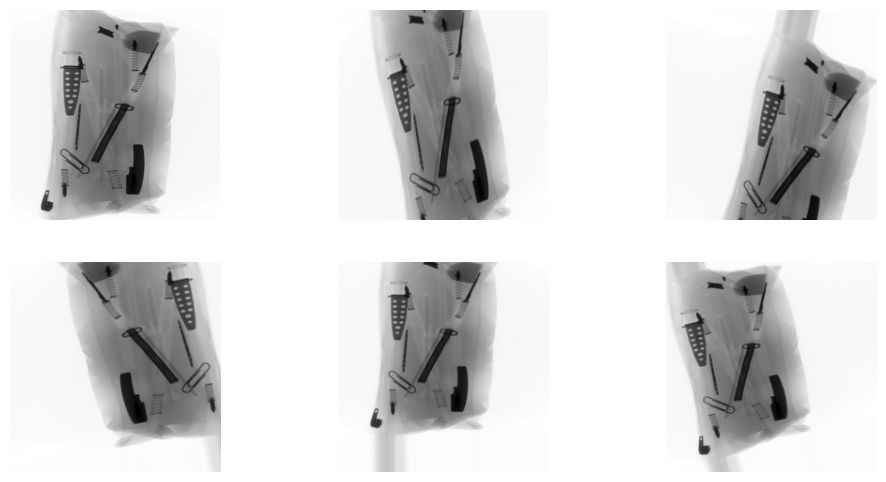

In [8]:
# check augmentation
agument(imgs[0])

image number 0
new number of images 5
image number 1
new number of images 10
image number 2
new number of images 15
image number 3
new number of images 20
image number 4
new number of images 25
image number 5
new number of images 30
image number 6
new number of images 35
image number 7
new number of images 40
image number 8
new number of images 45
image number 9
new number of images 50
image number 10
new number of images 55
image number 11
new number of images 60
image number 12
new number of images 65
image number 13
new number of images 70
image number 14
new number of images 75
image number 15
new number of images 80
image number 16
new number of images 85
image number 17
new number of images 90
image number 18
new number of images 95
image number 19
new number of images 100
image number 20


C:\Users\kwan\AppData\Local\Temp\ipykernel_13228\1065129862.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 6))


new number of images 105
image number 21
new number of images 110
image number 22
new number of images 115
image number 23
new number of images 120
image number 24
new number of images 125
image number 25
new number of images 130
image number 26
new number of images 135
image number 27
new number of images 140
image number 28
new number of images 145
image number 29
new number of images 150
image number 30
new number of images 155
image number 31
new number of images 160
image number 32
new number of images 165
image number 33
new number of images 170
image number 34
new number of images 175
image number 35
new number of images 180
image number 36
new number of images 185
image number 37
new number of images 190
image number 38
new number of images 195
image number 39
new number of images 200
image number 40
new number of images 205
image number 41
new number of images 210
image number 42
new number of images 215
image number 43
new number of images 220
image number 44
new number of im

KeyboardInterrupt: 

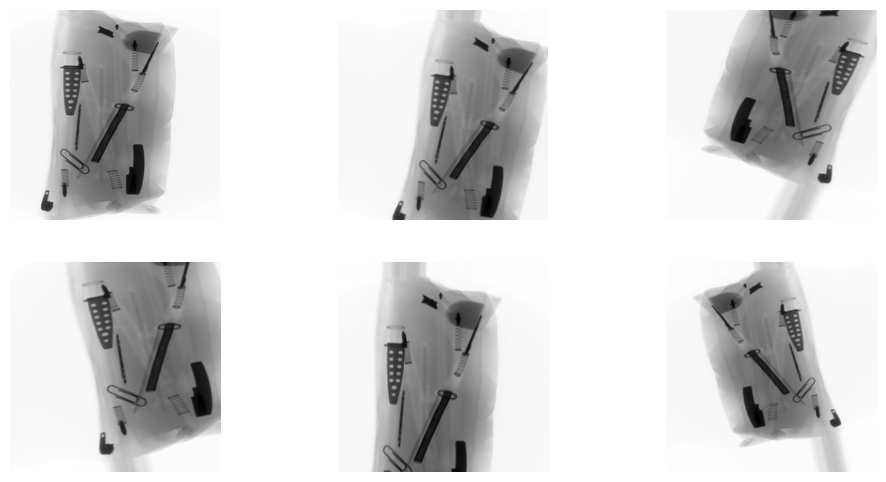

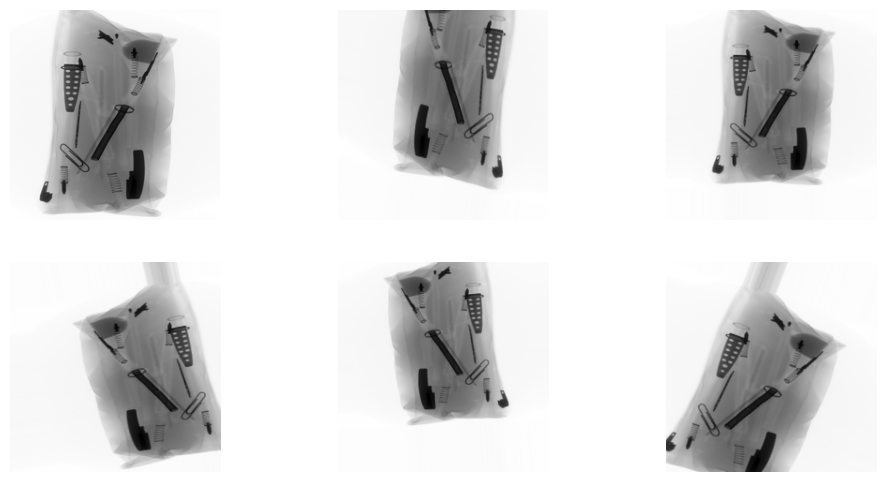

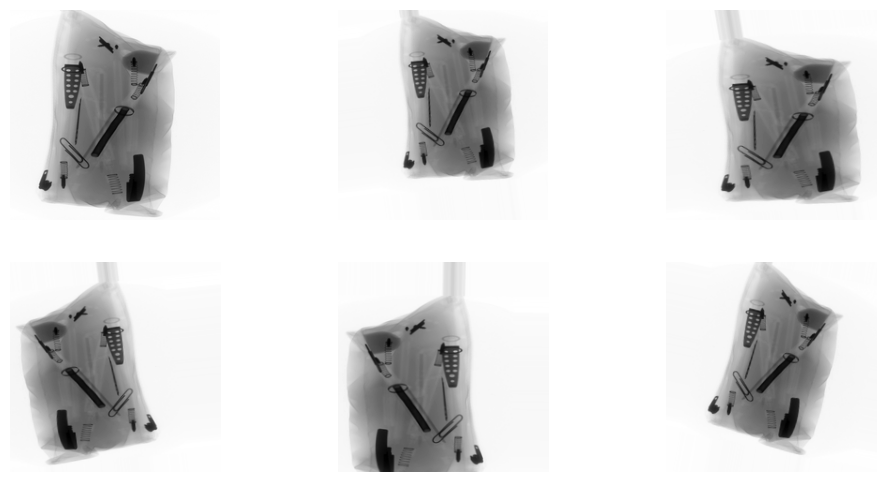

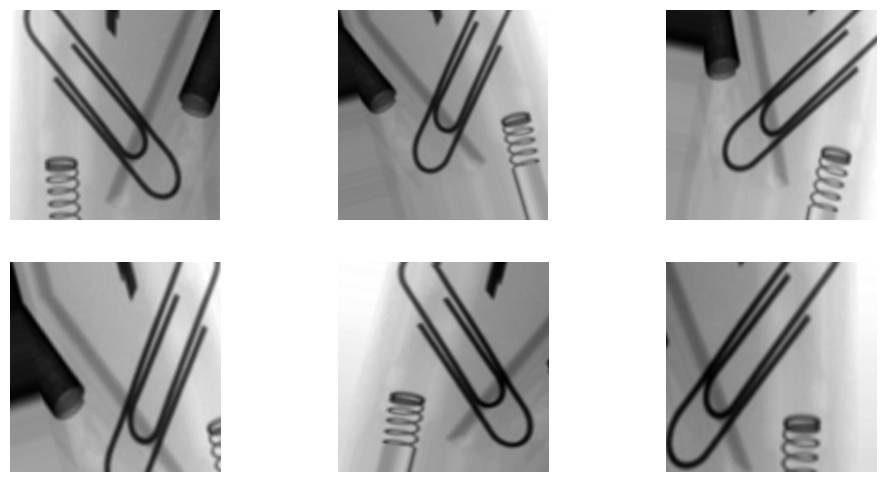

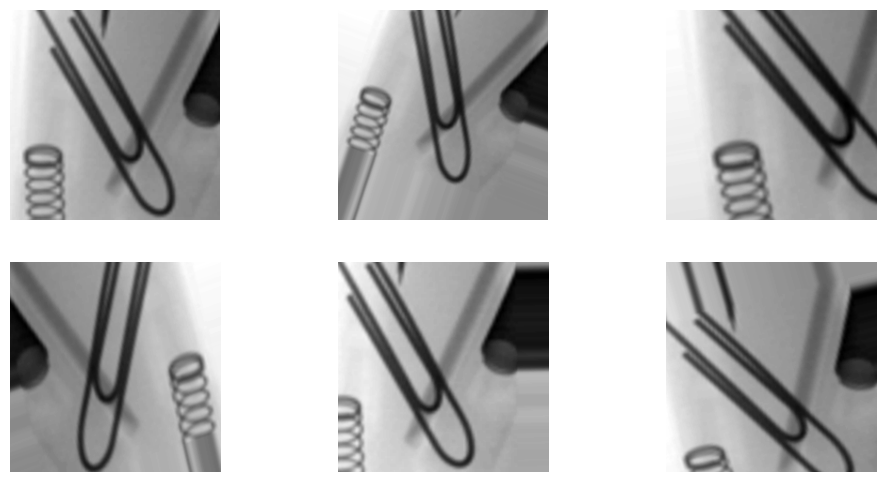

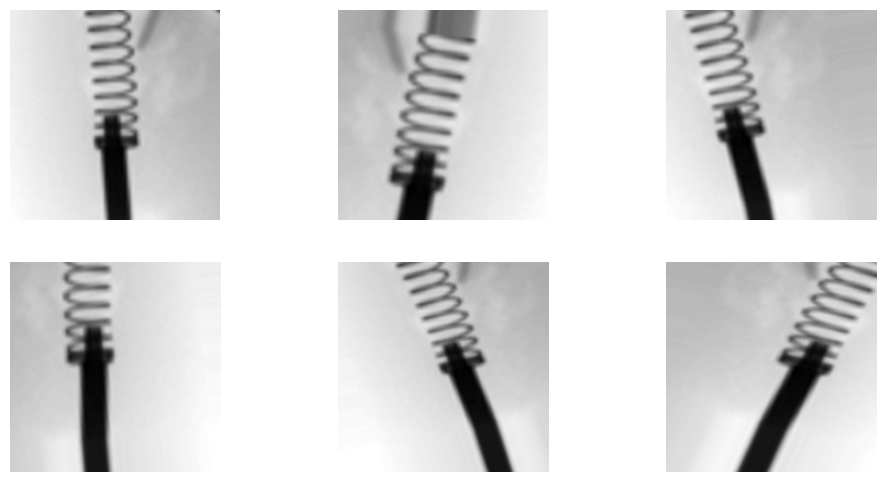

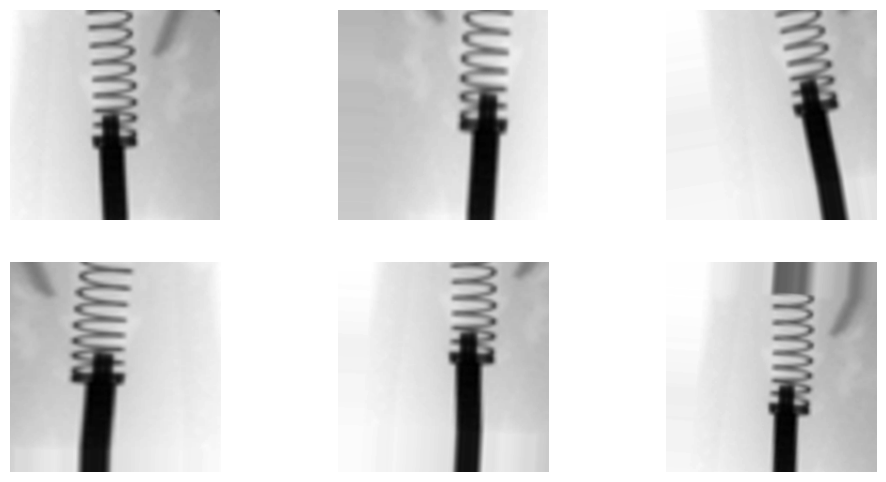

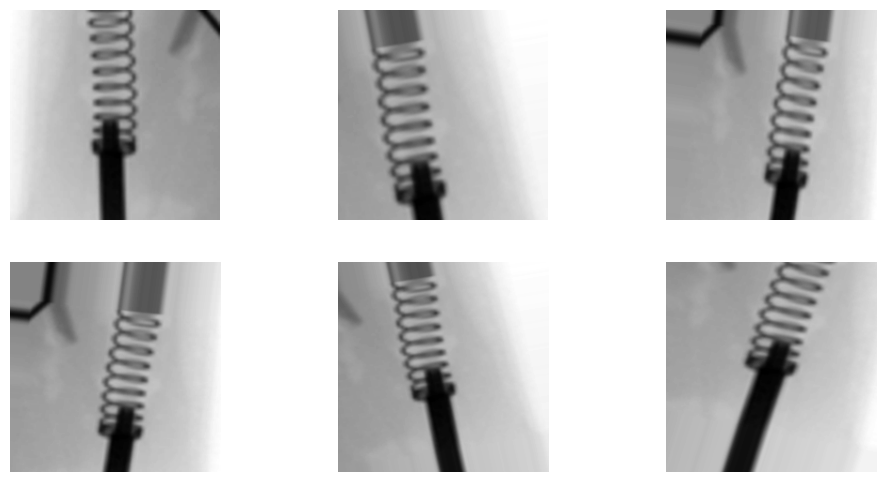

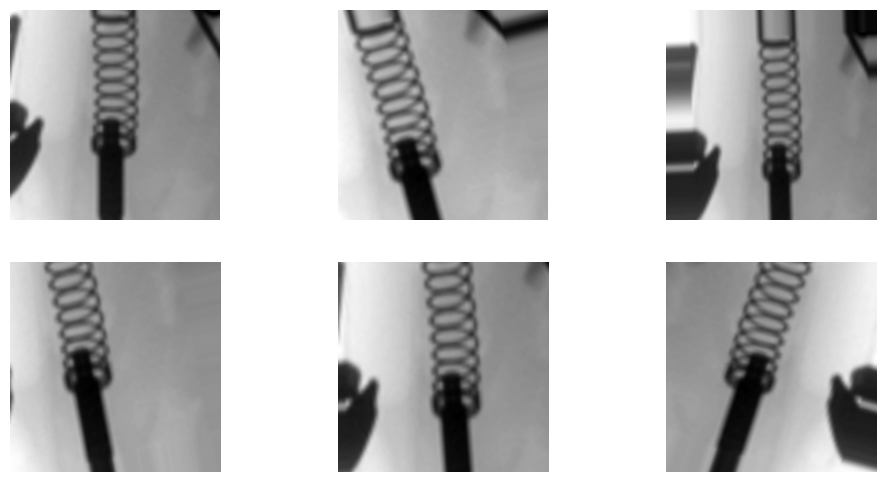

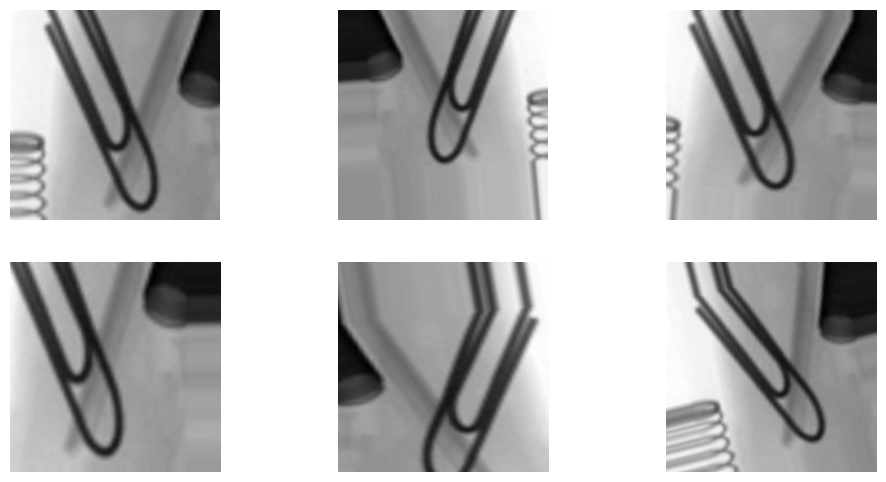

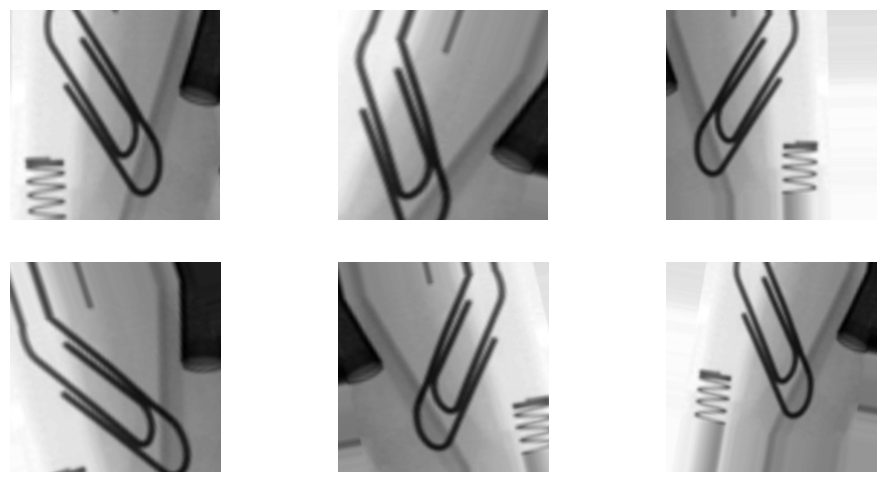

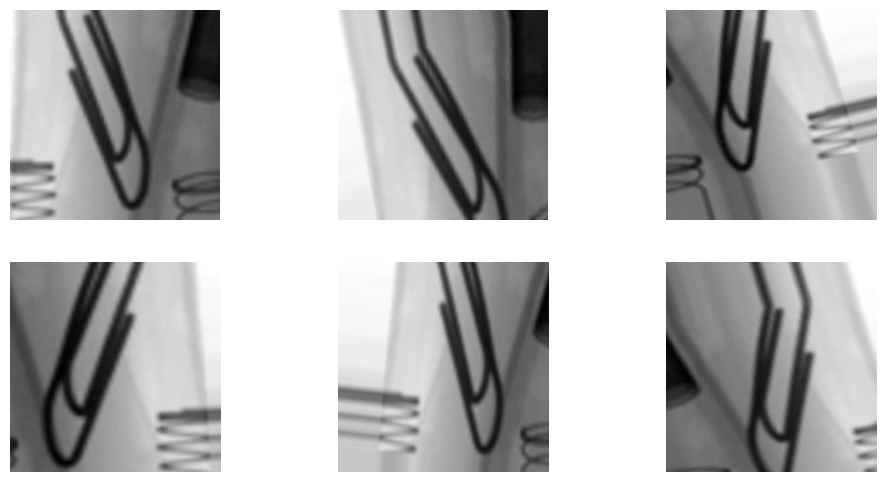

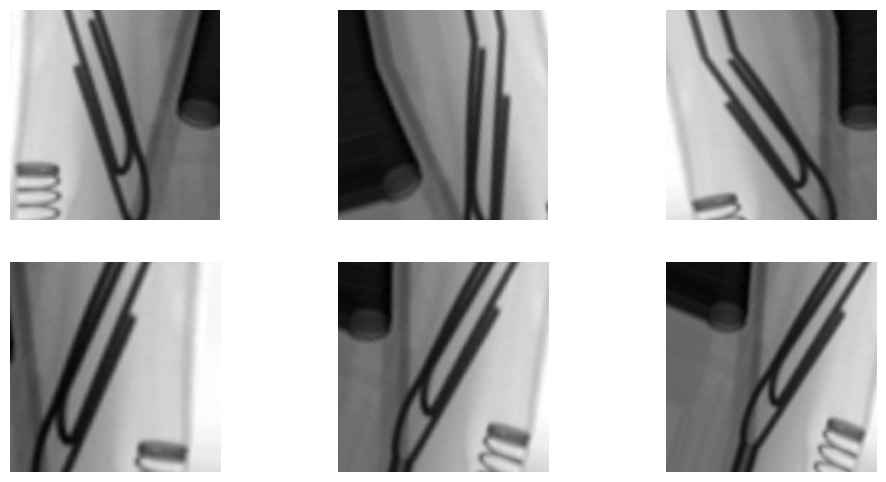

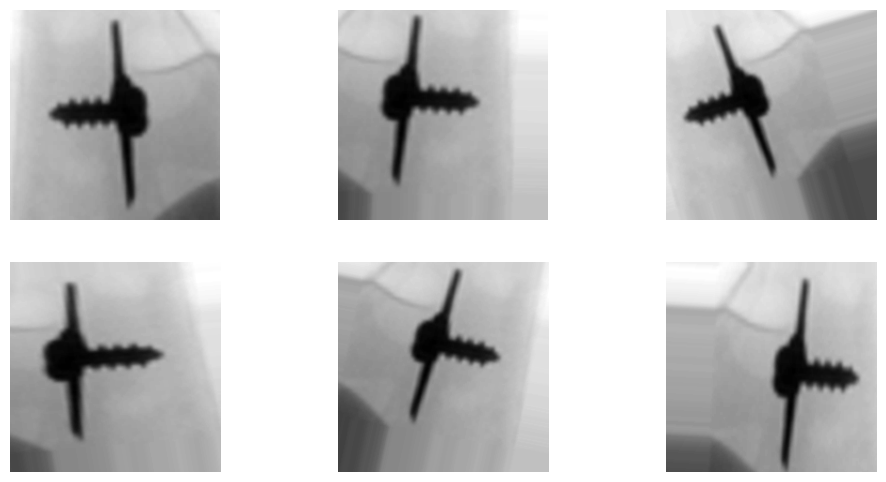

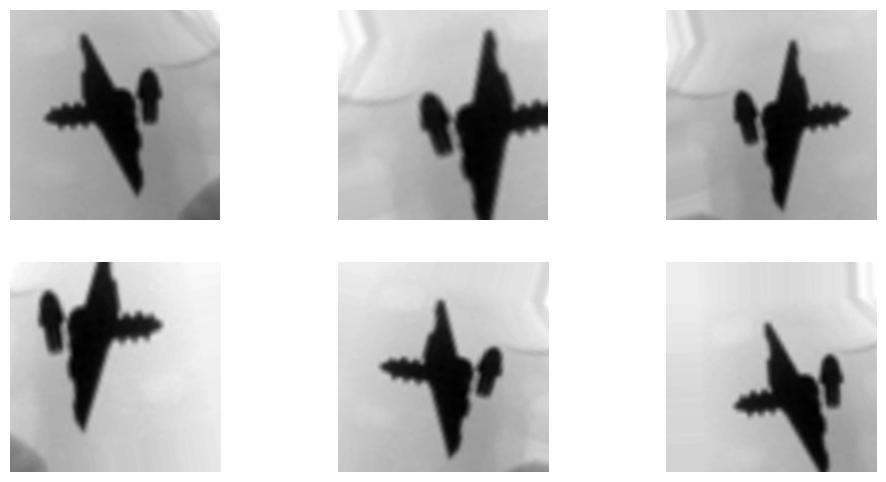

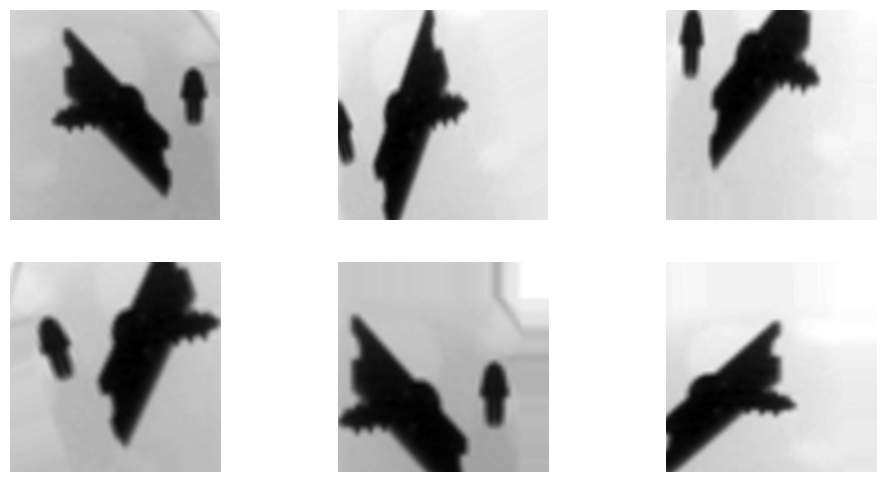

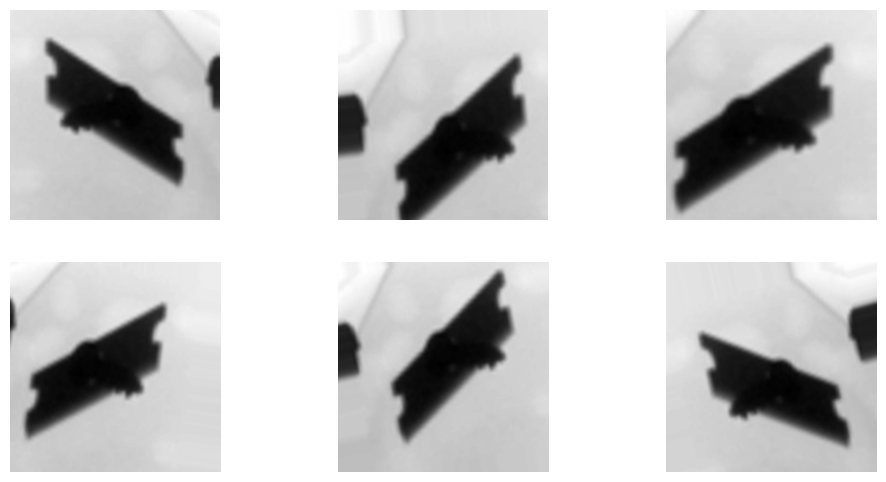

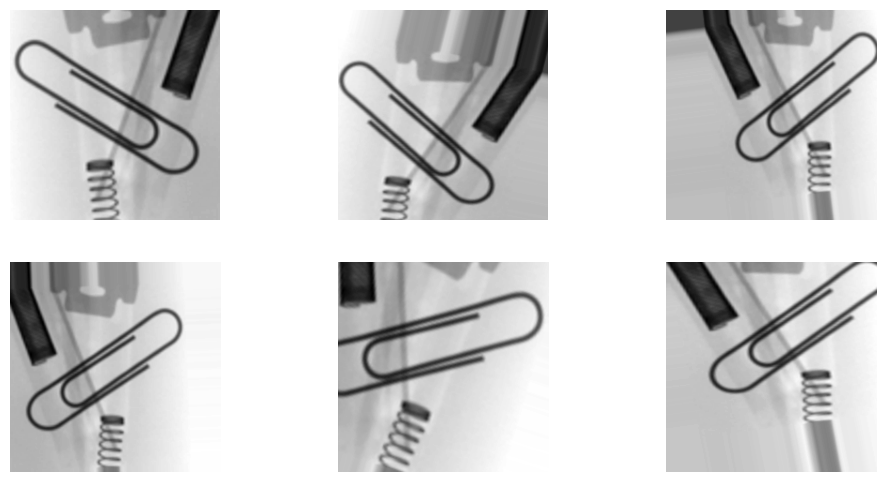

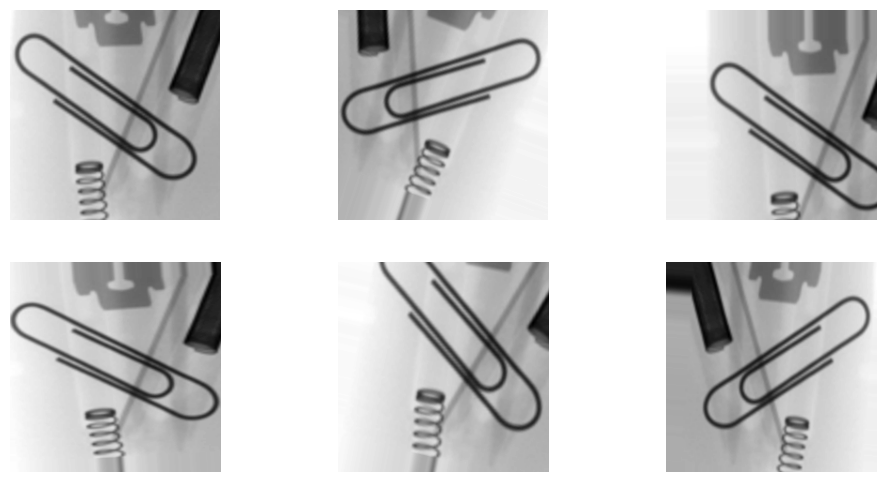

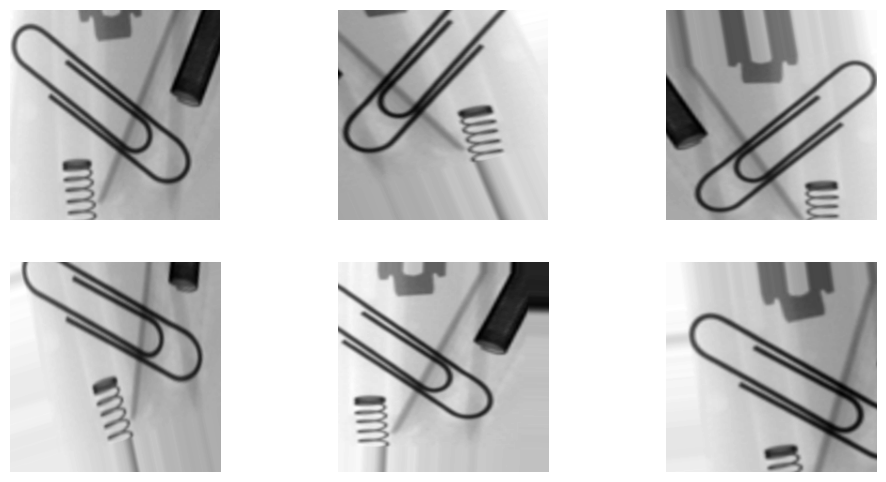

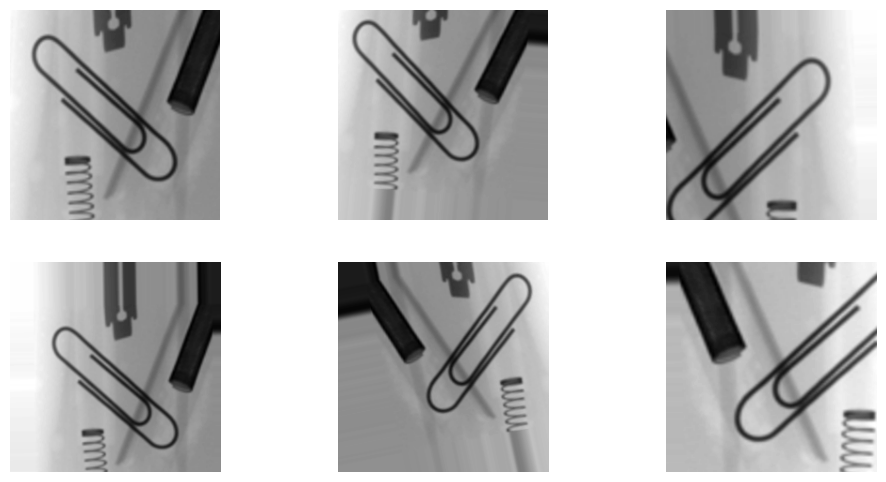

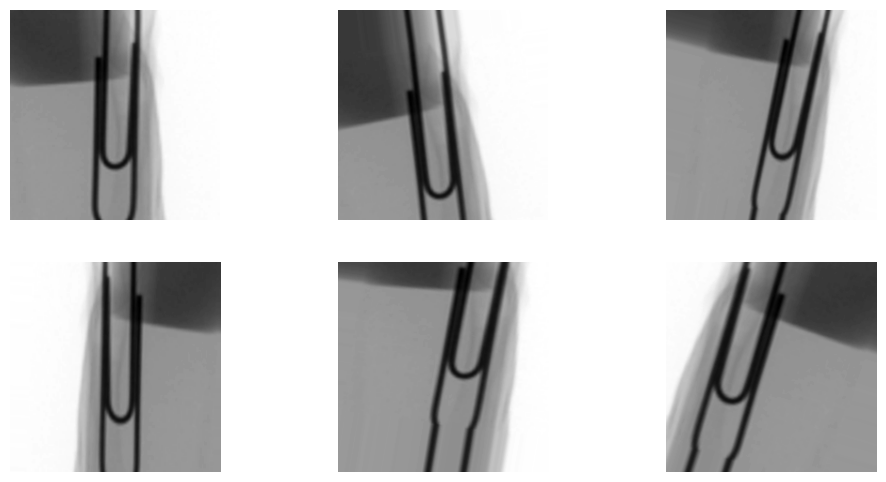

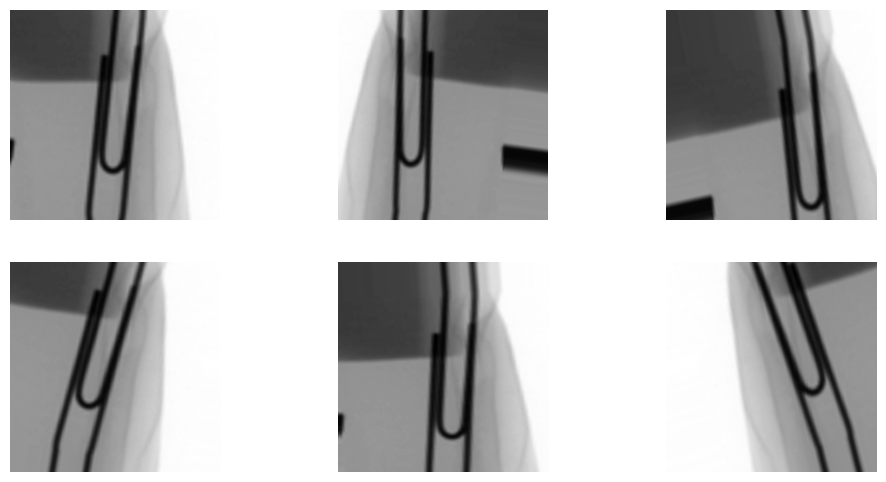

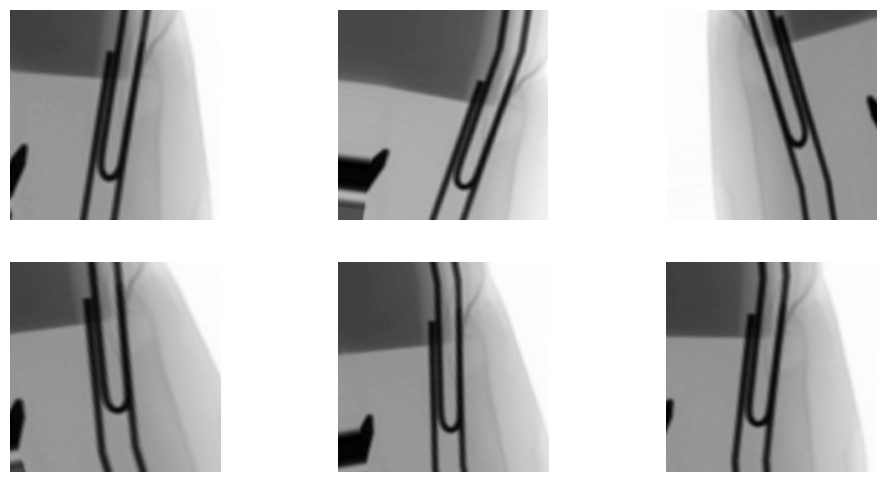

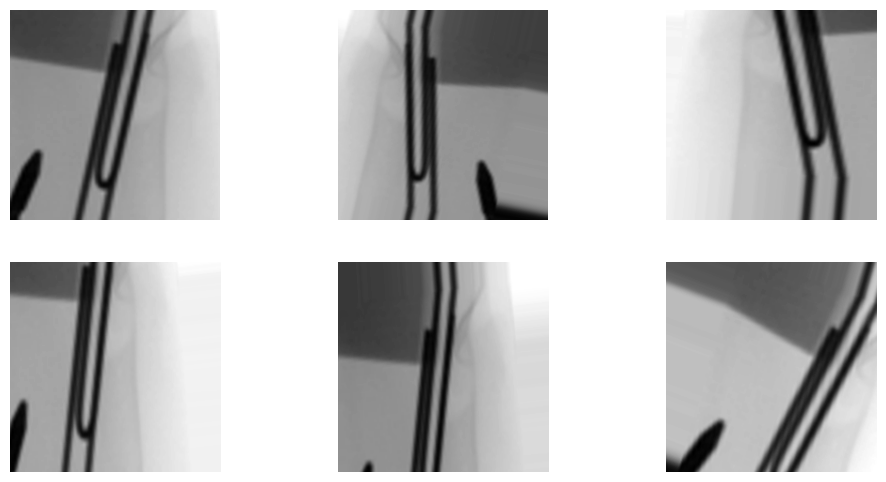

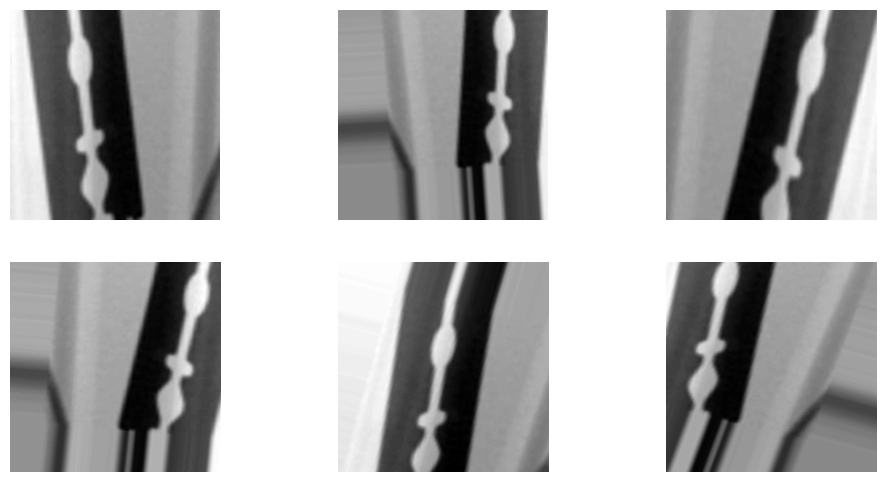

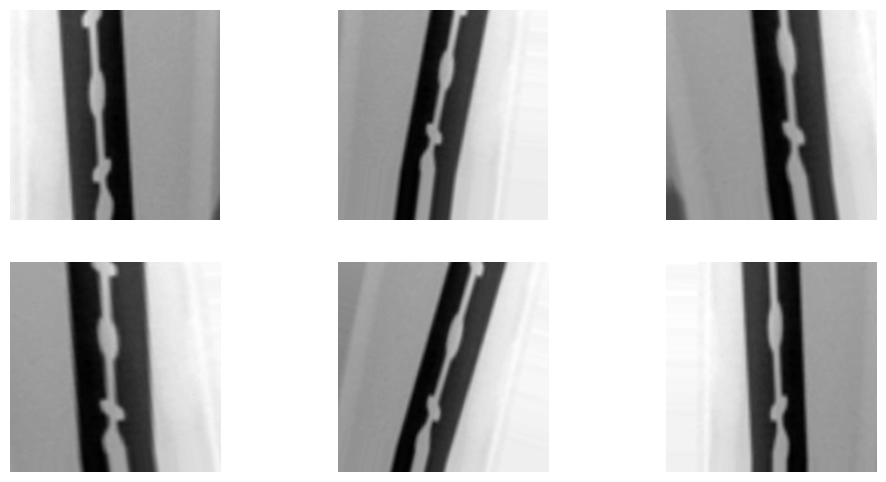

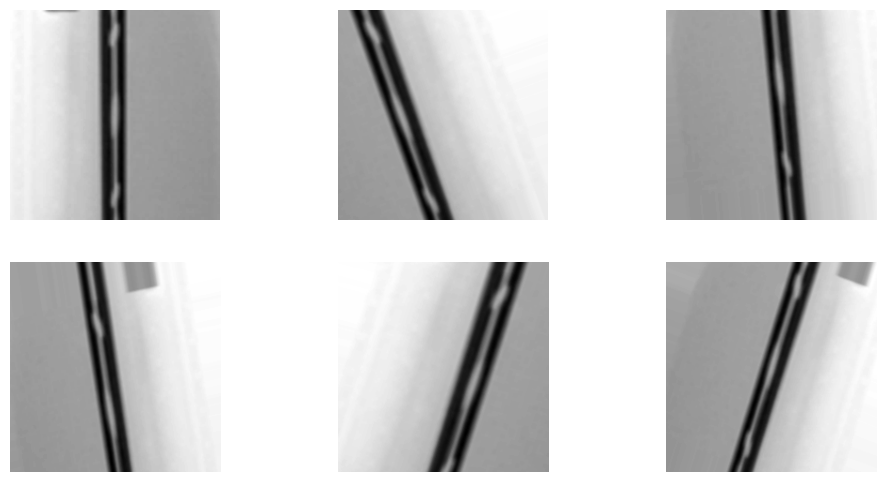

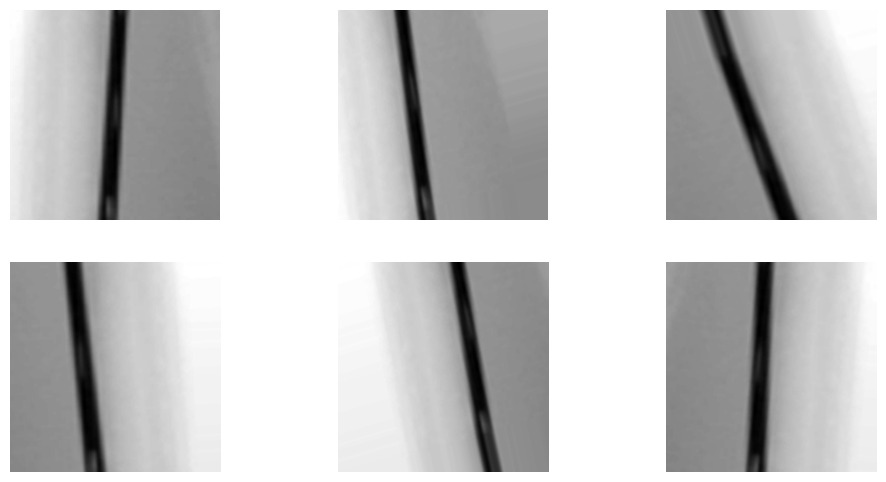

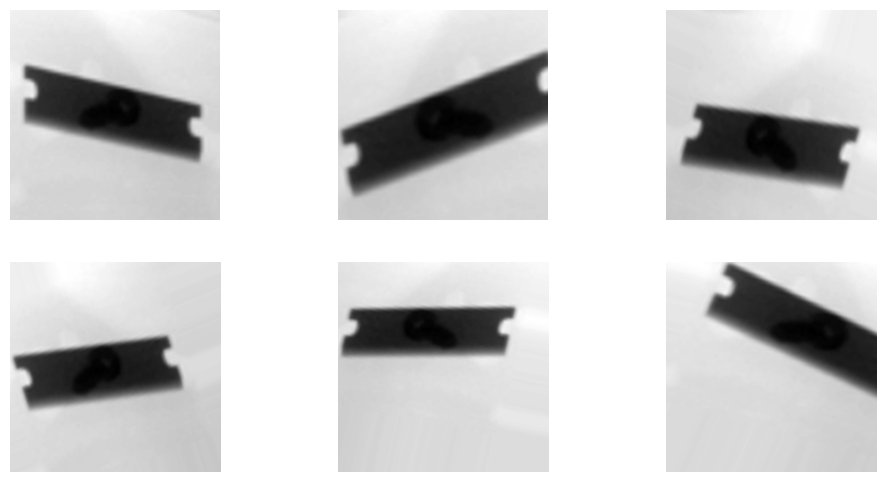

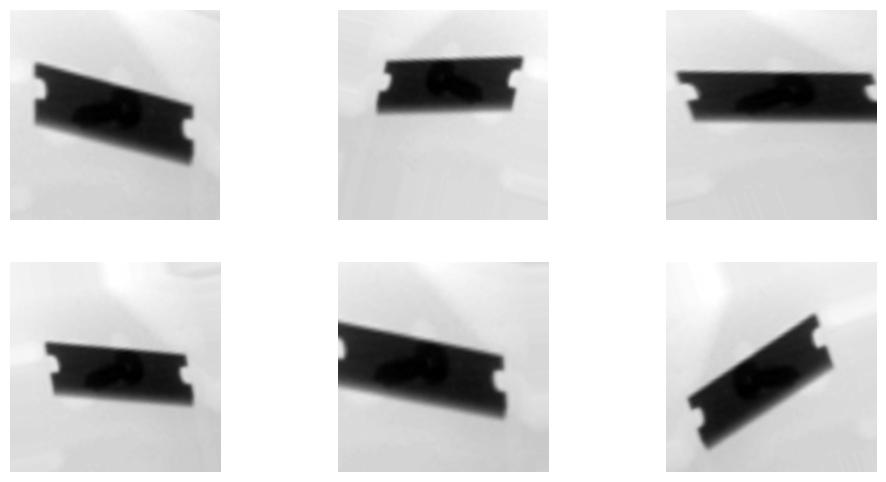

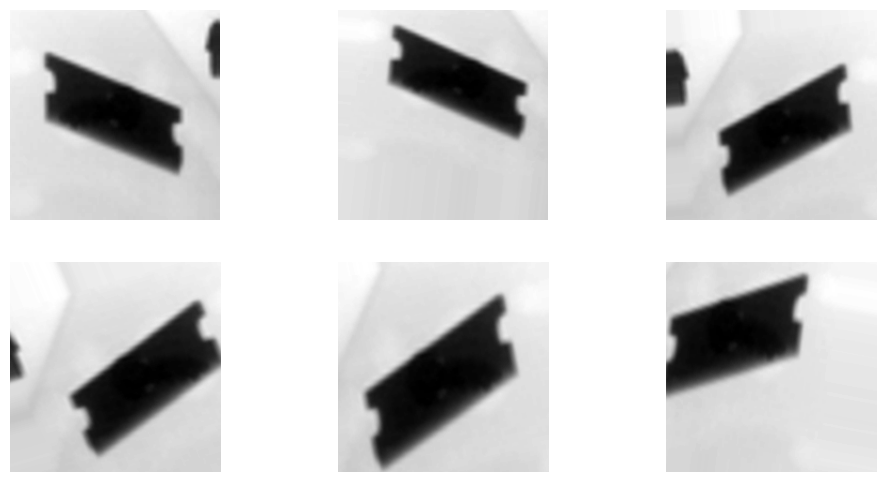

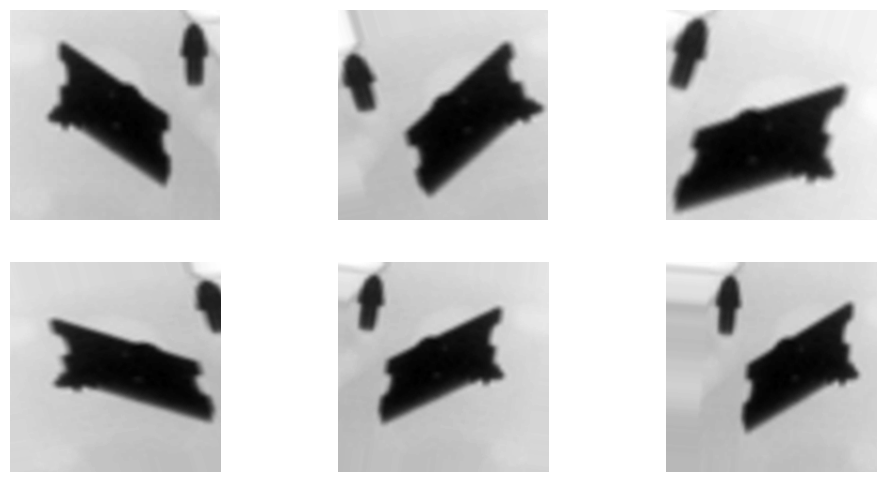

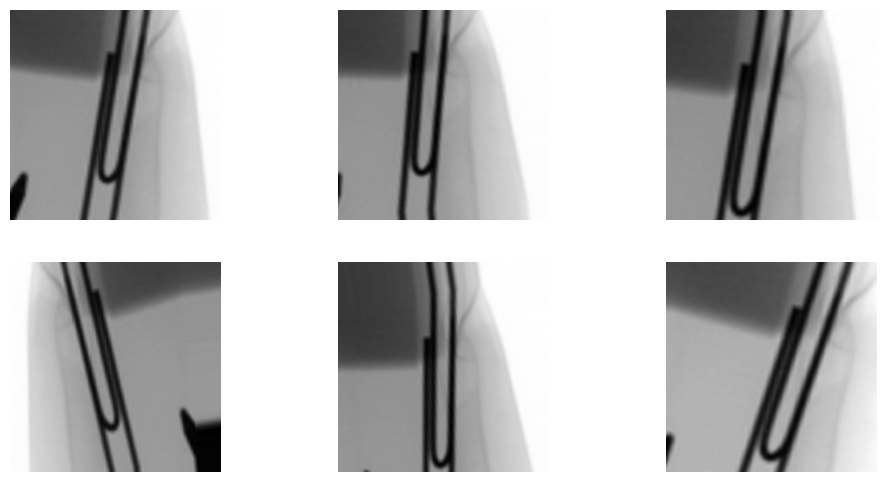

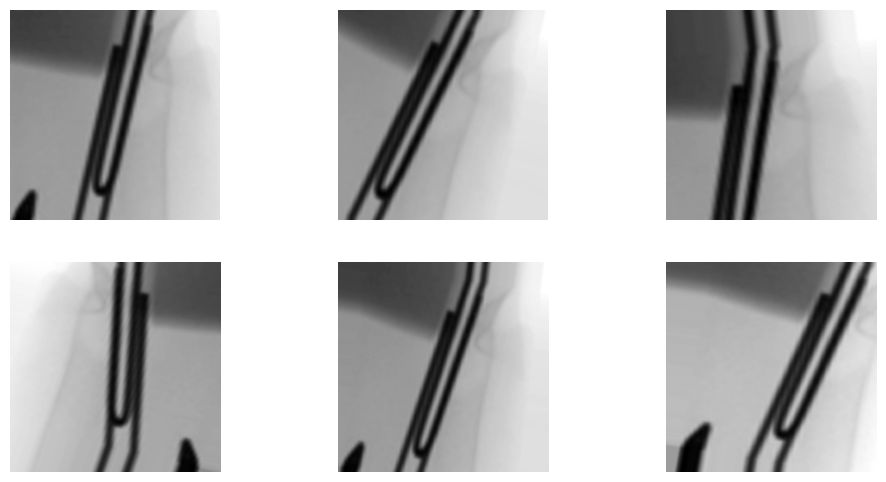

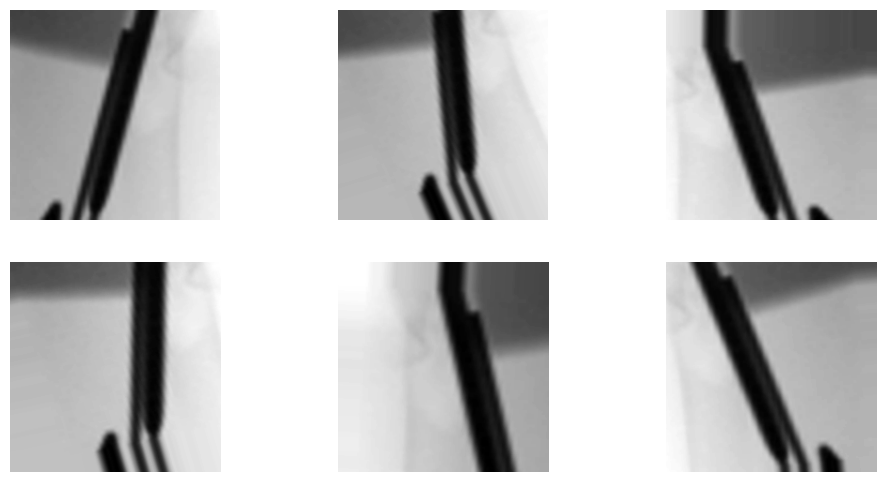

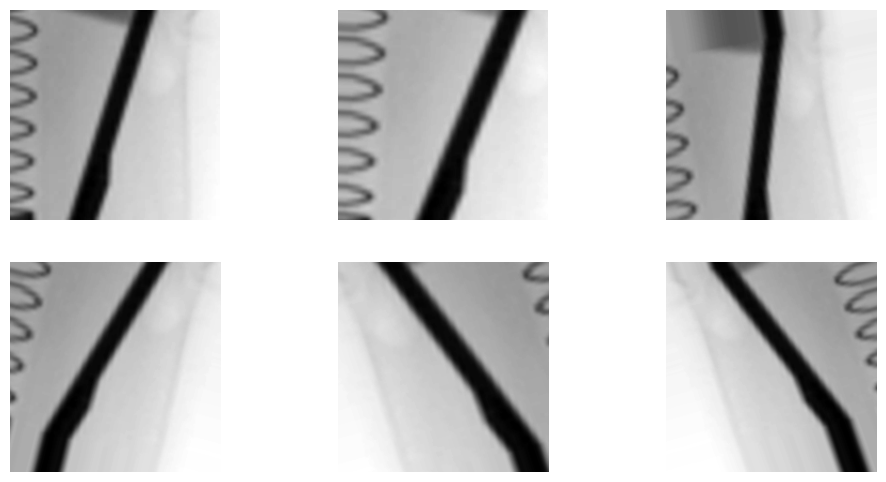

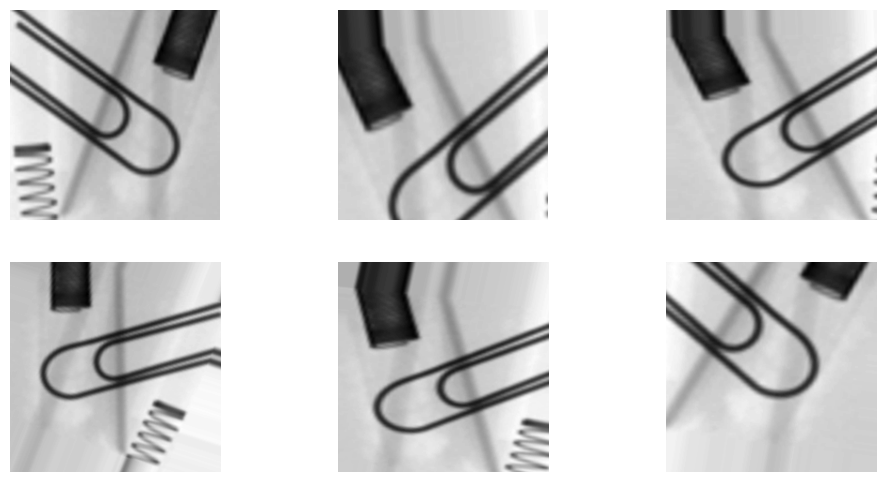

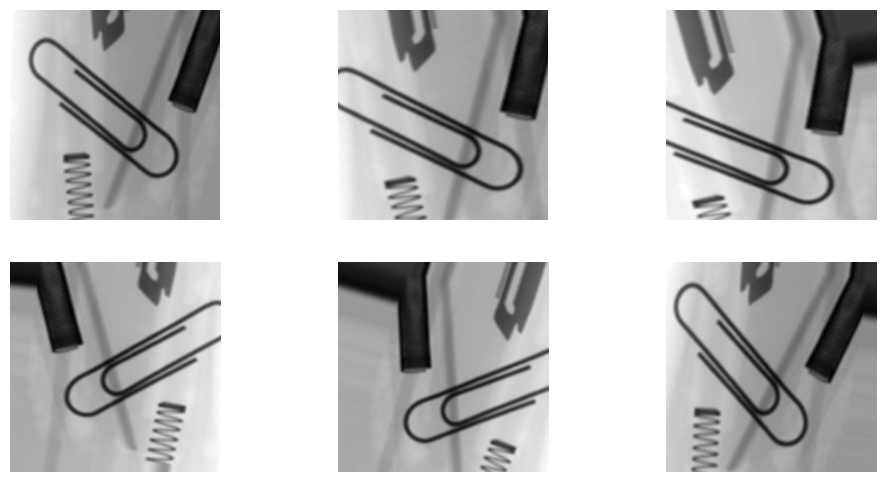

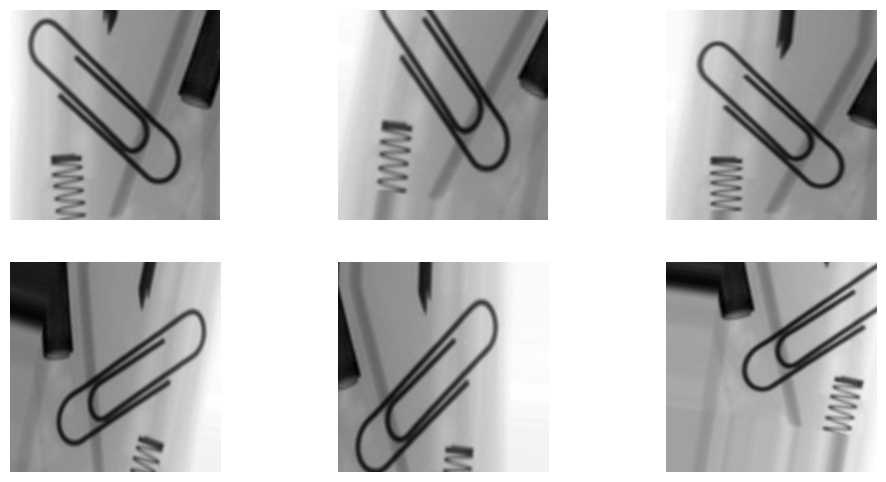

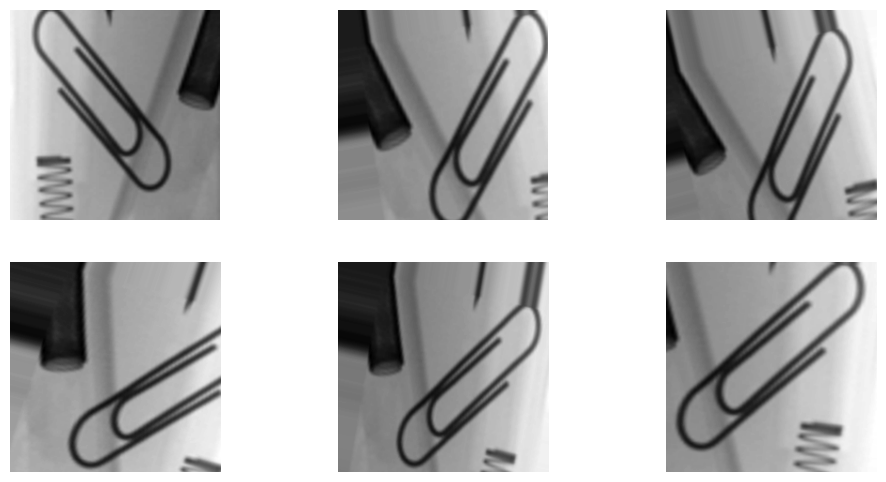

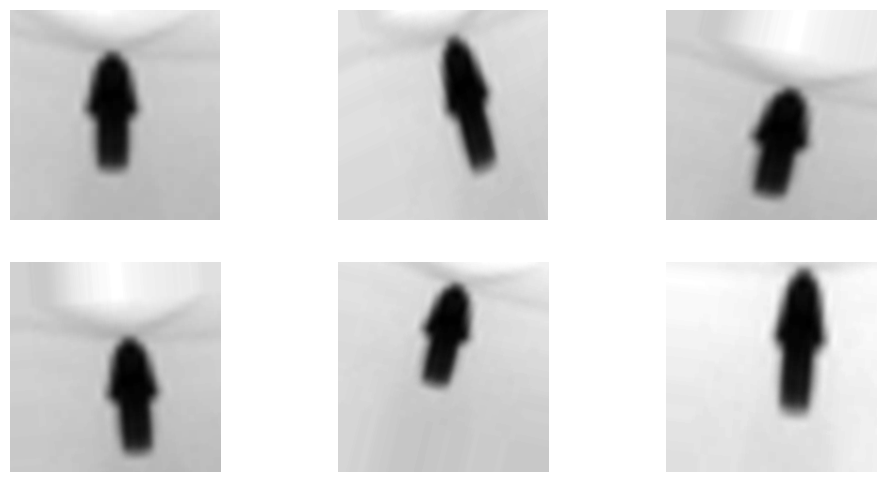

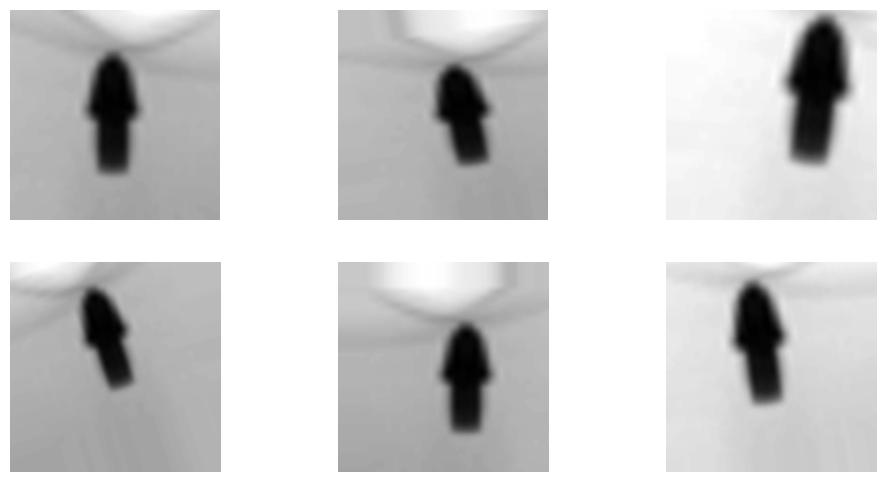

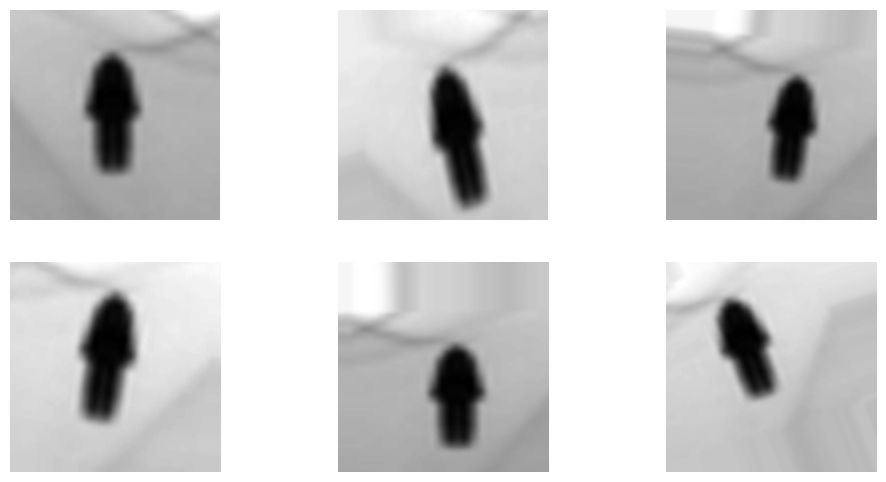

Error in callback <function flush_figures at 0x00000253D05E8CA0> (for post_execute):


KeyboardInterrupt: 

In [9]:
# Initialize an empty lists to store augmented images, y  and skipped images
augmented_image_arrays = []
y = []
skipped_image = []
# set counters to 0
i=0
# Iterate over the images   
for img in imgs:
    print(f'image number {i}')
    # check to see if images has correct shape
    if img.shape == imgs[0].shape:
        # if need to drop image # add
        # if (i != # ) or (i!=#2) ..."  : 
        #indent rest of lines after this and before else:
        # agument images
        augmented_images = agument(img)
        # append augmented images 
        augmented_image_arrays.extend(augmented_images) 
        # print size of augmented_image_arrays
        print(f'new number of images {len(augmented_image_arrays)}')
        # create list of images for dependent parameter
        # create list of images for dependent parameter
        for j in range(0,5):
            y.append(y_original.iloc[i,0])
    else:
        # if images has incorrect correct shape print out image number and append to list
        print(f'skipping image {i} as it has a shape of {img.shape}, but expecting {imgs[0].shape}')
        skipped_image.append(i)
    #adding 1 to counter
    i = i+1

In [ ]:
# print the skipped images
print(skipped_image)
#print shape
display(imgs[1260].shape)
#Is this a colored image and not in gray scale? 
#print shape expecting
display(imgs[0].shape)

In [ ]:
# print # of images
pd.DataFrame(y).shape

In [ ]:
# Save y  to a CSV file
np.savetxt('y_augmented_labels.csv', y, fmt='%s', delimiter=',')

In [ ]:
# create path for picle file
path = 'augmented_xray_images.pkl'

# Open a new file named 'img.pkl' with write permission
with open(path, 'wb') as file:
    # Use pickle.dump to store the list of images
    pickle.dump(augmented_image_arrays, file)

In [ ]:
# size of augmented_image_arrays
len(augmented_image_arrays)

In [ ]:
agument(imgs[0])

In [ ]:
augmented_image_arrays[0]